# Análise de Satisfação de Clientes - Pipeline ETL

Este notebook realiza um pipeline completo de ETL (Extração, Transformação e Carga) com um dataset fictício de satisfação de clientes.

---

## 1. Importação das Bibliotecas


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## 2. Extração

Aqui, realizamos a extração do dataset fictício salvo em CSV.


Apenas para ter uma ideia do que se trata o DataFrame, mostrarei quais são os tipos de dados presentes em cada coluna e posteriormente, as informações dos primeiros 5 clientes

In [112]:
# Leitura do CSV
df = pd.read_csv('/content/satisfacao_clientela.csv')

# Visualização inicial
df.describe()
print('\nInformações do 5 primeiros clientes:\n')
df.head()



Informações do 5 primeiros clientes:



,cliente_id,idade,regiao,nota_satisfacao,data_resposta
0,1,24,Sul,7,2025-01-01
1,2,35,Sudeste,9,2025-01-01
2,3,41,Centro-Oeste,6,2025-01-02
3,4,28,Nordeste,8,2025-01-02
4,5,52,Norte,5,2025-01-03


---

## Transformação

Limpeza e preparação dos dados.

* Conversão de tipos (data_resposta como datetime).
* Criação de colunas derivadas.
* Verificação de dados faltantes ou inconsistentes
* Filtragem de outliers ou dados incorretos.
* Cálculo de indicadores (exemplo: média por região).


In [113]:
# Convertendo data_resposta para datetime
df['data_resposta'] = pd.to_datetime(df['data_resposta'])

# Criando uma coluna categórica para satisfação (0 a 5 = Baixa; 6 a 8 = Média; 9 a 10 = Alta)
df['categoria_satisfacao'] = pd.cut(df['nota_satisfacao'],
                                    bins=[0,5,8,10],
                                    labels=['Baixa', 'Média', 'Alta'])

# Verificando dados faltantes
print(df.isnull().sum())
# como não há nenhuma valor nulo, nãp haverá tratamento em relação a isso


cliente_id              0
idade                   0
regiao                  0
nota_satisfacao         0
data_resposta           0
categoria_satisfacao    0
dtype: int64


In [114]:
print('Tabela atualizada com a nova coluna de satisfação categorica:\n')
df.head()

Tabela atualizada com a nova coluna de satisfação categorica:



,cliente_id,idade,regiao,nota_satisfacao,data_resposta,categoria_satisfacao
0,1,24,Sul,7,2025-01-01,Média
1,2,35,Sudeste,9,2025-01-01,Alta
2,3,41,Centro-Oeste,6,2025-01-02,Média
3,4,28,Nordeste,8,2025-01-02,Média
4,5,52,Norte,5,2025-01-03,Baixa


## Load (Carga)

Preparação e exportação dos dados transformados.


In [115]:
# Exportar o dataset transformado
df.to_csv('satisfacao_clientela_transformado.csv', index=False)

## Análise e Visualização

Geração de gráficos para análise exploratória.


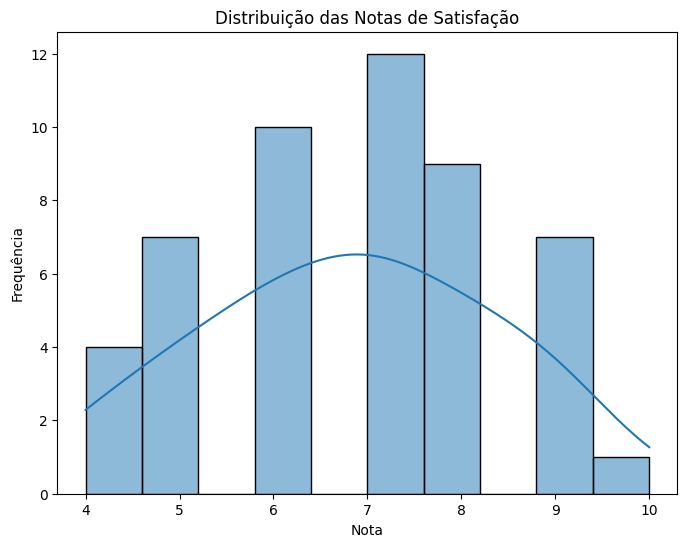

In [116]:
# Distribuição das notas de satisfação
plt.figure(figsize=(8,6)) # define o tamanho da figura
sns.histplot(df['nota_satisfacao'], bins=10, kde=True) # define o tipo de gráfico, neste caso um histograma com uma linha estimada da densidade de probabilidade
plt.title('Distribuição das Notas de Satisfação') # titulo do grafico
plt.xlabel('Nota') # nome do eixo X
plt.ylabel('Frequência') # nome do eixo Y
plt.show()

**Relação nota de satisfação X região**

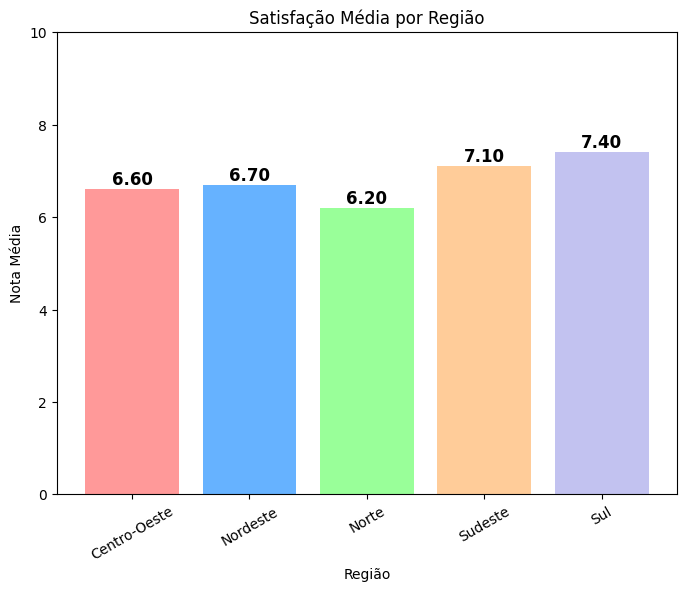

In [117]:
# DataFrame agrupado pela coluna 'regiao'
media_regiao = df.groupby('regiao')['nota_satisfacao'].mean().reset_index()

# Dados
regioes = media_regiao['regiao']
notas = media_regiao['nota_satisfacao']

# Cores personalizadas
cores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0']

plt.figure(figsize=(8,6))

# Plotando com plt.bar
barras = plt.bar(regioes, notas, color=cores)

# Adicionando os valores em cima de cada barra
for i, valor in enumerate(notas):
    plt.text(
        i,                  # posição no eixo x (índice)
        valor + 0.1,        # posição no eixo y ("altura" da barra + um pequeno valor)
        f'{valor:.2f}',     # texto formatado com 2 casas decimais
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

plt.title('Satisfação Média por Região')
plt.ylabel('Nota Média')
plt.xlabel('Região')
plt.xticks(rotation=30) # Rotacionando os valores do eixo X em 30º
plt.ylim(0, 10)  # Deixa espaço acima da maior barra

plt.show()


**Proporção de Categorias de Satisfação**

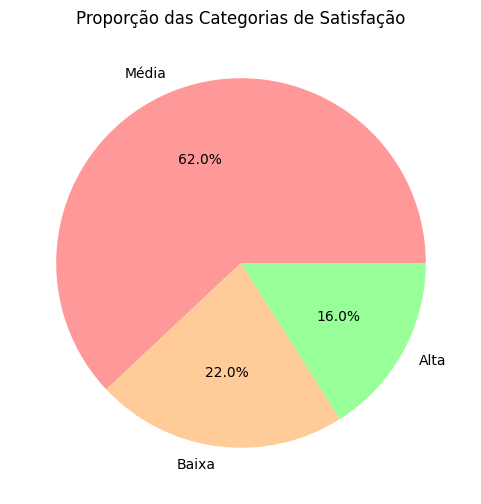

In [118]:
categoria_counts = df['categoria_satisfacao'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(categoria_counts, labels=categoria_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#FFCC99', '#99FF99'])
plt.title('Proporção das Categorias de Satisfação')
plt.show()

**Relação entre Idade e Nota de Satisfação por região**

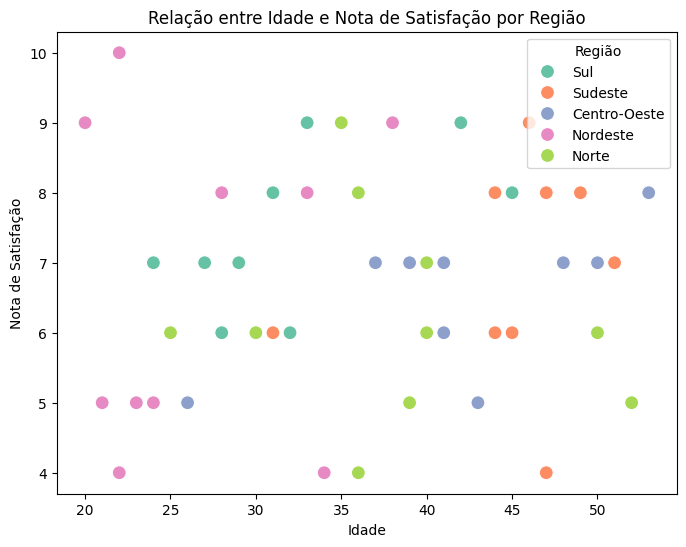

In [119]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='idade', y='nota_satisfacao', hue='regiao', palette='Set2', s=100)
plt.title('Relação entre Idade e Nota de Satisfação por Região')
plt.xlabel('Idade')
plt.ylabel('Nota de Satisfação')
plt.legend(title='Região')
plt.show()


**Distribuição das notas por região**

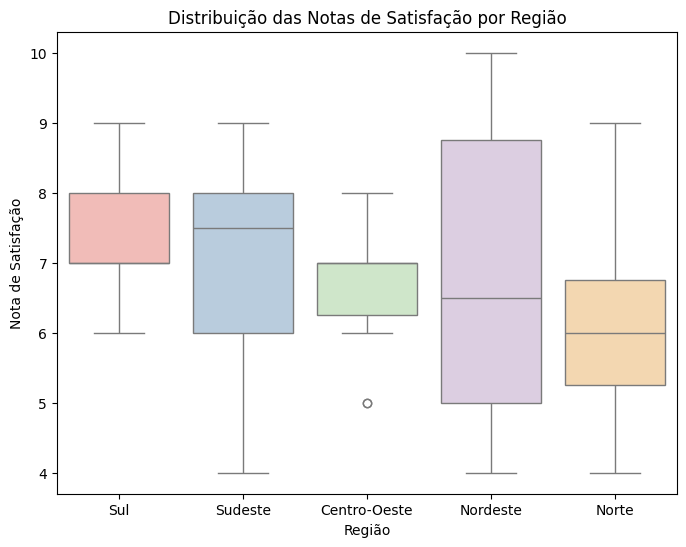

In [120]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='regiao', y='nota_satisfacao', palette='Pastel1', hue = 'regiao')
plt.title('Distribuição das Notas de Satisfação por Região')
plt.xlabel('Região')
plt.ylabel('Nota de Satisfação')
plt.show()


## Conclusão e insights

Neste projeto, foi realizado um pipeline ETL sobre um dataset de satisfação de clientes. A análise revelou que:

* A nota média de satisfação ficou em torno de 6, 7, com predominância de avaliações moderadas a altas (7 e 8). Apesar disso, ainda há uma parcela significativa de clientes que deram notas baixas, indicando oportunidade para melhorias.

* As regiões Sudeste e Sul concentram as notas mais altas, sugerindo maior aderência dos clientes nessas localidades. Já Norte e Nordeste apresentaram maior dispersão, com presença de avaliações negativas, reforçando a necessidade de estratégias regionais específicas.

* Clientes mais jovens, especialmente entre 18 e 30 anos, tendem a expressar maior satisfação, enquanto os acima de 45 anos mostraram tendência a notas mais baixas. Isso sugere a importância de ajustar estratégias conforme o perfil etário, visando melhorar a experiência dos públicos mais velhos.

* De modo geral, a satisfação é positiva, mas não homogênea; fatores como região, idade e padrões de coleta influenciam as avaliações. Para avanços concretos, recomenda-se personalizar ações por segmento e aprimorar o método de coleta para captar opiniões de forma mais contínua e diversa.


